In [1]:
# import_notebooks is a custom python script
# this line makes it possible to import functions from other IPython notebooks
from import_notebooks import *

In [2]:
# Here we import all the functions (*) from these notebooks
from Hainan_Data_Cleaning import *
from time_shift_dataframe import *
from Stratified_Split import *
from Cumulative import *
from Rollingsum import *

# from nn_model_keras import *

importing Jupyter notebook from Hainan_Data_Cleaning.ipynb
importing Jupyter notebook from time_shift_dataframe.ipynb
importing Jupyter notebook from Stratified_Split.ipynb
importing Jupyter notebook from Cumulative.ipynb
importing Jupyter notebook from Rollingsum.ipynb


In [3]:
from Utilities import*

importing Jupyter notebook from Utilities.ipynb


In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

In [5]:
# load_hainan_data() is from Hainan_Data_Cleaning and it loads hainan data
df = load_hainan_data()
df.head()


,Year,Month,Day,RawBiogas,BioCNG,LiquidFertilizer,SolidFertilizer,WasteWater,SolidResidues,PigManure,...,Percolate,Other,NaOH,FeCl2,PAM,Defoamer,ProjectElectricity,OfficeElectricity,Water,Diesel
0,2014,April,1,5154.0,1710.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,April,2,3426.0,1529.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014,April,3,5885.0,1795.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,April,4,3727.0,1361.0,0.0,0.0,0.0,0.0,14.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,April,5,4072.0,2436.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# timeshift_df is from time_shift_dataframe and it timeshifts the dataframe
# timeshift_df(df, time_shift=15, index=10) defaults are 15 and 10
# time_shift is the number of days to shift the index
# All columns left of the 'index' column will be shifted up by the timeshift

df_ts = timeshift_df(df)

df_ts_relfeatures = df_ts.drop(['Year', 'Month', 'Day','BioCNG', 'LiquidFertilizer',
       'SolidFertilizer', 'WasteWater', 'SolidResidues','ProjectElectricity',
       'OfficeElectricity', 'Water', 'Diesel'], axis=1)
# df_ts_relfeatures.head()
print(df_ts_relfeatures.shape[0])
df_ts_relfeatures = df_ts_relfeatures.apply(pd.to_numeric, errors='coerce')
df_ts_relfeatures = df_ts_relfeatures.dropna()
df_ts_relfeatures.head(10)

1413


,RawBiogas,PigManure,Cassava,FishWastewater,KitchenFoodWaste,MunicipalFecalWaste,TeaWaste,ChickenWaste,Bagasse,AlcoholWaste,ChineseMedicineWaste,EnergyGrass,BananaFruitShafts,LemonWaste,Percolate,Other,NaOH,FeCl2,PAM,Defoamer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6839.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6251.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7593.0,14.2,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6732.0,14.2,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_15= cumulative(df_ts_relfeatures, 15)

In [8]:
df_20= cumulative(df_ts_relfeatures, 20)

In [9]:
df_10= cumulative(df_ts_relfeatures, 10)

In [10]:
[x_train, x_test, y_train, y_test]= test_train_for_classification(df_10, output_var="RawBiogas", num_buckets = 7)

In [11]:
y_train.shape


(112,)

The accuracy for C = 1 in skf set # 1 is: 0.620689655172
The accuracy for C = 1 in skf set # 2 is: 0.413793103448
The accuracy for C = 1 in skf set # 3 is: 0.48275862069
The accuracy for C = 1 in skf set # 4 is: 0.413793103448
The accuracy for C = 1 in skf set # 5 is: 0.48275862069
The accuracy average for C = 1 is: 0.48275862069

The accuracy for C = 2 in skf set # 1 is: 0.48275862069
The accuracy for C = 2 in skf set # 2 is: 0.448275862069
The accuracy for C = 2 in skf set # 3 is: 0.586206896552
The accuracy for C = 2 in skf set # 4 is: 0.586206896552
The accuracy for C = 2 in skf set # 5 is: 0.48275862069
The accuracy average for C = 2 is: 0.51724137931

The accuracy for C = 3 in skf set # 1 is: 0.51724137931
The accuracy for C = 3 in skf set # 2 is: 0.51724137931
The accuracy for C = 3 in skf set # 3 is: 0.655172413793
The accuracy for C = 3 in skf set # 4 is: 0.448275862069
The accuracy for C = 3 in skf set # 5 is: 0.448275862069
The accuracy average for C = 3 is: 0.51724137931

T

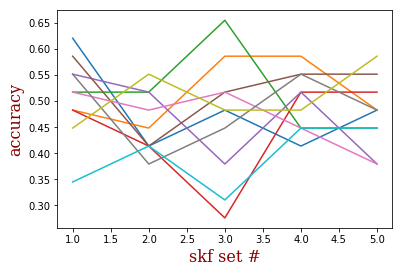

In [21]:
C_array = np.arange(1, 11) # an array of C values from 1 to 10 for the stratified data
C_averages =[] # an array of accuracies from 5 different skf data sets for each C value 
from sklearn.linear_model import LogisticRegression

for C in C_array:
    C_total = 0
    set_number = 0
    C_acc = [] #story
    
    for i in range(1,6):
        [x_train, x_test, y_train, y_test]= test_train_for_classification(df_10, output_var="RawBiogas", num_buckets = 5)
        
        logreg = LogisticRegression(penalty="l2", C=C)
        logreg.fit(x_train,y_train)
        score = logreg.score(x_test, y_test)
        
        C_acc.append(score)
        C_total = C_total + score
        
        set_number += 1
        print("The accuracy for C =", C, "in skf set #", set_number, "is:", logreg.score(x_test, y_test))
    
    print("The accuracy average for C =", C, "is:", C_total/5)
    new_C = [C_total/5]
    C_averages = C_averages + new_C #collect averages for different C
    plt.plot(np.arange(1,6), C_acc)
    plt.xlabel('skf set #', fontdict=font)
    plt.ylabel('accuracy', fontdict=font)
    print()
    
print(C_averages)

The accuracy for C = 100 in skf set # 1 is: 0.448275862069
The accuracy for C = 100 in skf set # 2 is: 0.310344827586
The accuracy for C = 100 in skf set # 3 is: 0.51724137931
The accuracy for C = 100 in skf set # 4 is: 0.413793103448
The accuracy for C = 100 in skf set # 5 is: 0.310344827586
The accuracy average for C = 100 is: 0.4

The accuracy for C = 101 in skf set # 1 is: 0.551724137931
The accuracy for C = 101 in skf set # 2 is: 0.448275862069
The accuracy for C = 101 in skf set # 3 is: 0.551724137931
The accuracy for C = 101 in skf set # 4 is: 0.448275862069
The accuracy for C = 101 in skf set # 5 is: 0.448275862069
The accuracy average for C = 101 is: 0.489655172414

The accuracy for C = 102 in skf set # 1 is: 0.379310344828
The accuracy for C = 102 in skf set # 2 is: 0.551724137931
The accuracy for C = 102 in skf set # 3 is: 0.379310344828
The accuracy for C = 102 in skf set # 4 is: 0.241379310345
The accuracy for C = 102 in skf set # 5 is: 0.448275862069
The accuracy average 

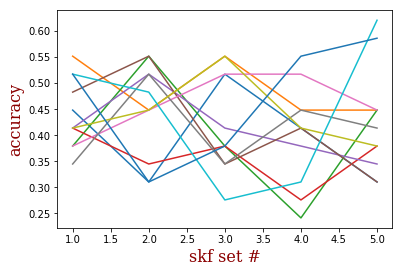

In [19]:
C_array = np.arange(100, 111) # an array of C values from 1 to 10 for the stratified data
C_averages =[] # an array of accuracies from 5 different skf data sets for each C value 
from sklearn.linear_model import LogisticRegression

for C in C_array:
    C_total = 0
    set_number = 0
    C_acc = [] #story
    
    for i in range(1,6):
        [x_train, x_test, y_train, y_test]= test_train_for_classification(df_10, output_var="RawBiogas", num_buckets = 5)
        
        logreg = LogisticRegression(penalty="l1", C=C)
        logreg.fit(x_train,y_train)
        score = logreg.score(x_test, y_test)
        
        C_acc.append(score)
        C_total = C_total + score
        
        set_number += 1
        print("The accuracy for C =", C, "in skf set #", set_number, "is:", logreg.score(x_test, y_test))
    
    print("The accuracy average for C =", C, "is:", C_total/5)
    new_C = [C_total/5]
    C_averages = C_averages + new_C #collect averages for different C
    plt.plot(np.arange(1,6), C_acc)
    plt.xlabel('skf set #', fontdict=font)
    plt.ylabel('accuracy', fontdict=font)
    print()
    
print(C_averages)